# Project 1

Define a function to plot a scatter matrix with all the features except for the last one being the output variable.

In [121]:
from matplotlib.pyplot import savefig, show
from pandas.plotting import scatter_matrix
def visualise_data(data: DataFrame):
	scatter_matrix(data, figsize=(12, 8))
	savefig("scatter_matrix_plot")
	show()

After inspecting the data, the `No` column is just a label on the instance which is irrelevant. Therefore it will be dropped along with the 2 output variables.

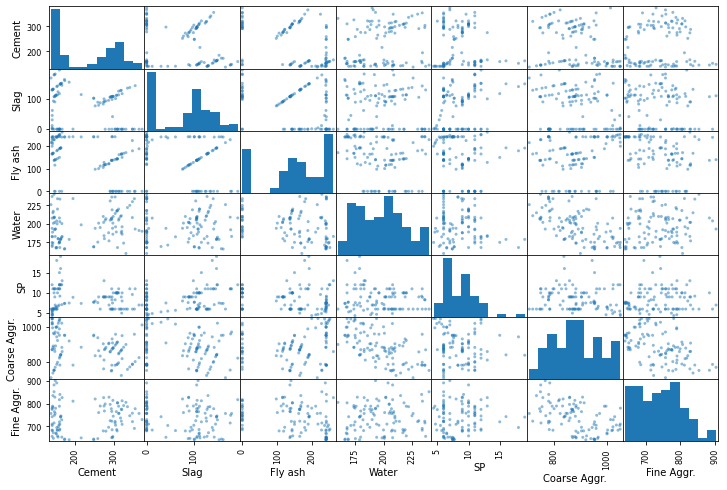

In [122]:
from pandas import read_csv, DataFrame
from sklearn.model_selection import train_test_split
data = read_csv('slump_test.data')
data.drop(columns=['No', 'SLUMP(cm)', 'FLOW(cm)'], inplace=True)
X = data[data.columns[:-1]]
Y = data.iloc[:, -1]
visualise_data(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Looking at the scatter plot, none of the features are linearly correlated. Now move on to feature scaling.

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[ 9.37606962e-01,  4.39351875e-01, -1.70143607e+00,
         6.70349624e-01,  4.51370809e-01, -3.33479341e-02,
         4.10147234e-02],
       [ 6.07202830e-01,  3.29117379e-02, -4.95736975e-01,
         6.70349624e-01,  1.13357966e-01,  2.30691544e-01,
        -9.72939245e-01],
       [-9.68570727e-01,  4.71867086e-01, -1.05320126e-01,
        -1.98275934e-01, -9.00680564e-01,  9.29318164e-02,
         5.86989937e-01],
       [-8.41492214e-01, -1.30021191e+00,  4.45856601e-01,
        -1.06690149e+00,  7.89383652e-01,  1.21796959e+00,
         7.27383564e-01],
       [ 3.40337953e-01, -6.46338950e-02, -5.87599763e-01,
        -1.47180313e-01, -2.24654878e-01, -5.61426891e-01,
         1.22656090e+00],
       [ 1.22988754e+00, -1.30021191e+00,  9.50835869e-03,
        -5.55945282e-01, -2.24654878e-01,  7.70250478e-01,
        -5.20559782e-01],
       [-3.92905065e-01, -1.29533463e+00,  1.05444757e+00,
         1.90686365e+00,  7.95566814e-02, -1.18593766e+00,
         1.0752477

In [124]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
lin = LinearRegression()
lin.fit(x_train, y_train)
sgd = SGDRegressor()
sgd.fit(x_train, y_train)
svr = SVR()
svr.fit(x_train, y_train)
model = VotingRegressor([('lin', lin), ('sgd', sgd), ('svr', svr)])
model.fit(x_train, y_train)

VotingRegressor(estimators=[('lin', LinearRegression()),
                            ('sgd', SGDRegressor()), ('svr', SVR())])

In [125]:
from sklearn.metrics import mean_squared_error
print(f'Linear Regressor {mean_squared_error(y_test, lin.predict(x_test))}')
print(f'Stochastic Gradient Decend Regressor {mean_squared_error(y_test, sgd.predict(x_test))}')
print(f'Support Vector Machine Regressor {mean_squared_error(y_test, svr.predict(x_test))}')
print(f'Voting Regressor {mean_squared_error(y_test, model.predict(x_test))}')

Linear Regressor 4.569329449489988
Stochastic Gradient Decend Regressor 2.001149227936253e+28
Support Vector Machine Regressor 58.31124562032948
Voting Regressor 3.578508617590216e+28


# Project 2

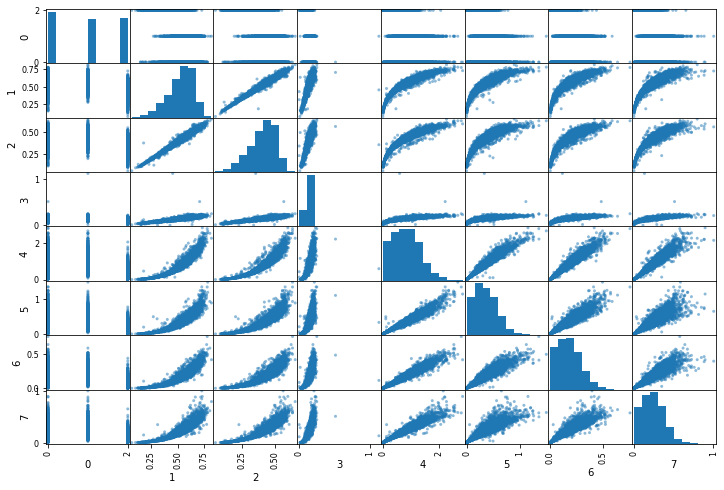

,0,1,2,3,4,5,6,7
0,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549
1,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706
2,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330
3,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338
4,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355
5,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617
6,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656
7,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000


In [141]:
from pandas import read_csv, DataFrame
data = read_csv('abalone.data', header=None)
data.replace({'M': 0, 'F': 1, 'I': 2}, inplace=True)
X = data[data.columns[:-1]]
Y = data.iloc[:, -1]
visualise_data(X)
X.corr()

Looking at the scatter plot, features 1, 2 and 4, 5, 6 are strongly correlated linearly, consulting the correlation matrix they all have a value greater than 0.96 so only keep features 1 and 4 and drop the others.

/var/folders/bd/lc87r1k13mn1brzczjc3km580000gn/T/ipykernel_30187/1090038421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=[2, 5, 6], inplace=True)


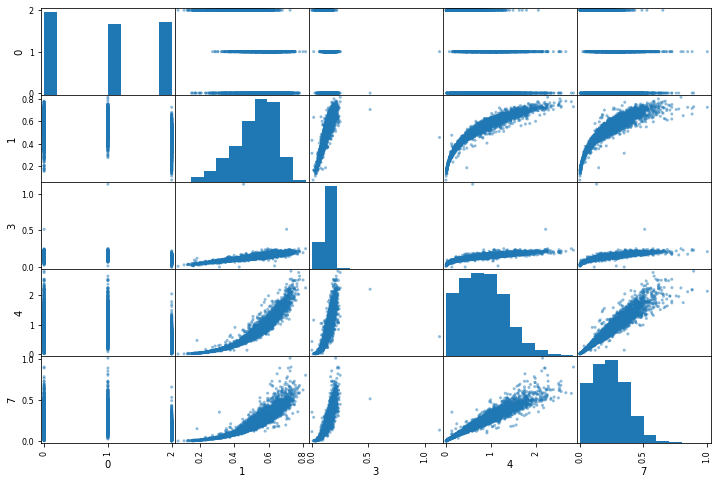

,0,1,3,4,7
0,1.000000,-0.448765,-0.417928,-0.461238,-0.445549
1,-0.448765,1.000000,0.827554,0.925261,0.897706
3,-0.417928,0.827554,1.000000,0.819221,0.817338
4,-0.461238,0.925261,0.819221,1.000000,0.955355
7,-0.445549,0.897706,0.817338,0.955355,1.000000


In [142]:
X.drop(columns=[2, 5, 6], inplace=True)
visualise_data(X)
X.corr()

In [143]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

In [144]:
from sklearn.ensemble import RandomForestRegressor
rnd = RandomForestRegressor(500)
rnd.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500)

In [145]:
y_pred = rnd.predict(x_test)
mean_squared_error(y_test, list(map(round, y_pred)))

6.417862838915471

In [146]:
rnd.feature_importances_

array([0.04165255, 0.14335638, 0.09029729, 0.17032026, 0.55437353])